In [9]:
#Ch.03(03-1) 2번 문제 출력 그래프 인증하기	
#114-129
#모델 파라미터에 대해 설명하기
#->검색 값의 주변 이웃값(n)을 찾아 평균값과 비교하여 유사도 검색
#python 3.6
#%config Completer.use_jedi = False


In [7]:
#!pip install numpy
#!pip install matplotlib
#!pip install scikit-learn

In [2]:
import numpy as np

In [5]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

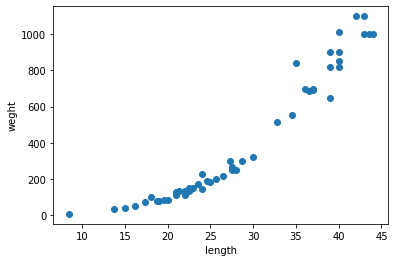

In [13]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weght')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [30]:
trainInput, testInput, trainTarget, testTarget = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
test_array = np.array([1,2,3,4])
print(test_array)
print(test_array.shape)

[1 2 3 4]
(4,)


In [4]:
testArray = test_array.reshape(2,2)
print(testArray)
print(testArray.shape)

NameError: name 'test_array' is not defined

In [34]:
#trainInput = train_input.reshape(2,21)  #21짜리 2개
trainInput = trainInput.reshape(-1,1)    #1짜리 배열로 자동으로 잘라서 만들기
print(train_input, trainInput)
testInput = testInput.reshape(-1, 1)
print('----')
print(test_input, testInput)


[30.  27.5 25.6 24.  21.  24.  39.  27.5 37.  40.  40.  23.  22.5 16.2
 27.5 39.  22.7 35.  43.  22.  25.  22.  22.5 19.6 21.   8.4 15.  39.
 34.5 26.5 40.  43.5 23.5 44.  18.  17.4 22.  43.  20.  36.5 28.7 13.7] [[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
----
[40.  22.  19.  36.  18.7 37.  27.3 22.  42.  21.  32.8 28.  21.3 24.6] [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
knr = KNeighborsRegressor()
knr.fit(trainInput, trainTarget)
print(knr.score(testInput, testTarget))

0.992809406101064


In [37]:
from sklearn.metrics import mean_absolute_error
testPreediction = knr.predict(testInput)
mae = mean_absolute_error(testTarget, testPreediction)
print(mae)

#todo:19g만큼 다르다는데 19g의 단위가 뭘까

19.157142857142862


In [38]:
print(knr.score(trainInput, trainTarget))

0.9698823289099254


In [39]:
knr.n_neighbors = 3
knr.fit(trainInput, trainTarget)
print(knr.score(trainInput, trainTarget))


0.9804899950518966


In [40]:
knr.score(testInput, testTarget)

0.9746459963987609

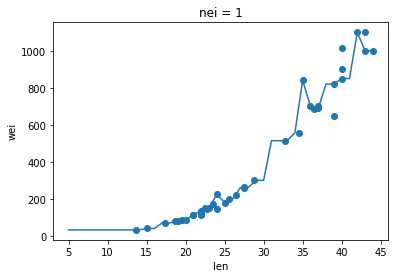

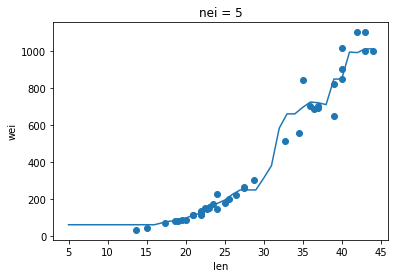

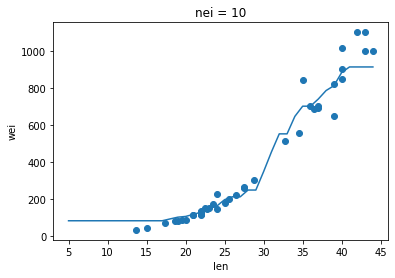

In [48]:
knr=KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)
# x = np.arange(5, 45).reshape(-1, 1)
for n in [1,5,10]:
    knr.n_neighbors = n
#     knr.n_neighbors = n
    knr.fit(trainInput, trainTarget)
#     knr.fit(trainInput, trainTarget)
    prediction = knr.predict(x)
    
    plt.scatter(trainInput, trainTarget)
    plt.plot(x, prediction)
    
    plt.title('nei = {}'.format(n))
    plt.xlabel('len')
    plt.ylabel('wei')
    plt.show()